In [1]:
#Importing main module
from cosmicfishpie.fishermatrix.cosmicfish import FisherMatrix
import numpy as np

# Choose input parameters

In [2]:
#Define the observables you are interested in
observables = [['WL']]


#Input options for CosmicFish (global options)
options = {'accuracy': 1,
           'outroot': 'LCDM_camb_int-small-HMc2020',
           'results_dir': 'results/',
           'derivatives': '3PT',
           'nonlinear': True,
           'feedback': 2,
           'survey_name': 'Euclid',
           'specs_dir' : '../survey_specifications/',
           'survey_name_photo': 'Euclid-Photometric-'+'ISTF-Pessimistic',
           #'survey_name_spectro': 'Euclid-Spectroscopic-'+'ISTF-Pessimistic',
           'cosmo_model' : 'LCDM',
           'code': 'camb',
           'camb_config_yaml':'../boltzmann_yaml_files/camb/default.yaml'}

#Internally Cosmicfish converts these Parameters to the coresponding parameters in CAMB or CLASS 
fiducial = {
            "Omegam":0.3186,
            "ombh2":0.0227,
            "w0":-1.0,
            "wa":0.,
            "h":0.6737,
            "ns":0.966,
            "logAs":3.04,
            "mnu":0.06,
            "Neff":3.043
            }

#Intrinsic alignment modeling.
IApars = {'IA_model': 'eNLA',
          'AIA': 0.16,
          'betaIA': 0.0,
          'etaIA': 1.66}
#Parameters to be varied and analyzed and their percentage variation for numerical derivatives
# IA params and photometric galaxy bias are added automatically to these parameters
freepars = {
            #'Omegam': 0.01,
            'ombh2': 0.01,
            'logAs' : 0.01,
            #'w0': 0.01,
            #'wa': 0.01,
            #'h': 0.01,
            #'ns': 0.01,
            #'sigma8': 0.01
            }

In [3]:
specsdics = [
    {'name': 'lmax750',
     'lmax_WL' :  750
     },
    {'name': 'lmax1500',
     'lmax_WL' :  1500
     },
    {'name': 'lmax3000',
     'lmax_WL' :  3000
     },
    {'name': 'lmax5000',
     'lmax_WL' :  5000
     }
]

In [4]:
runFishers = False

In [5]:
FishersList = []
cosmoFM = dict()
for obse in observables:
    for specd in specsdics:
        options['outroot'] = 'LCDM_camb_int-small-HMc2020'
        options['outroot'] = options['outroot']+"-"+specd.pop('name')
        print("-->running: ", options['outroot'])
        print("Dic to add: ")
        print(specd)
        cosmoFM[options['outroot']] = FisherMatrix(fiducialpars=fiducial, 
                            freepars=freepars, 
                            options=options,
                            IApars=IApars,
                            observables=obse,
                            cosmoModel=options['cosmo_model'],
                            surveyName=options['survey_name'],
                            specifications=specd
                            )
        if runFishers:
            FishersList.append(cosmoFM[options['outroot']].compute())

-->running:  LCDM_camb_int-small-HMc2020-lmax750
Dic to add: 
{'lmax_WL': 750}
**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

**************************************************************
 This is the new Python version of the CosmicFish code.
**************************************************************
Custom fiducial parameters loaded

  -> Computing cosmology at the fiducial point

Cosmology computation took 3.97 s

  ---> Cosmological functions obtained in:   3.98 s
No photo-z parameters specified. Using default: Euclid-like
*** Dictionary of varied parameters in this Fisher Matrix run: 
{'ombh2': 0.01, 'logAs': 0.01, 'AIA': 0.035, 'betaIA': 0.035, 'etaIA': 0.035}
                                                            ***

----------RECAP OF SELECTED OPTIONS--------

Settings:
   accu

## Loading Fisher Matrices from files

In [33]:
import glob
from cosmicfishpie.analysis import fisher_matrix as fm
from cosmicfishpie.analysis import fisher_operations as fo
from cosmicfishpie.analysis import fisher_plotting as fpp
from cosmicfishpie.analysis import colors

file_list = glob.glob('./results/CosmicFish_v1.0*LCDM*camb*small*fishermatrix.txt')
file_list.sort()
for fi, ff in enumerate(file_list):
    print(f"ii: {fi}, file name: {ff}")

ii: 0, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax1500_WL_fishermatrix.txt
ii: 1, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax3000_WL_fishermatrix.txt
ii: 2, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax5000_WL_fishermatrix.txt
ii: 3, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax750_WL_fishermatrix.txt
ii: 4, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020_WL_fishermatrix.txt
ii: 5, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small_WL_fishermatrix.txt


In [34]:
file_list_filter = [file_list[ii] for ii in [3,0,1]]
print(file_list_filter)
fisher_list = [fm.fisher_matrix(file_name=ff) for ff in file_list_filter]

['./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax750_WL_fishermatrix.txt', './results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax1500_WL_fishermatrix.txt', './results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax3000_WL_fishermatrix.txt']


In [35]:
Fishes = fisher_list
#plotFishnames = [fish.name for fish in fisher_list]
plotFishnames = [
    'WL LCDM_2par HMc elmx = 750',
    'WL LCDM_2par HMc elmx = 1500',
    'WL LCDM_2par HMc elmx = 3000' #,
    #'WL LCDM_2par HMc elmx = 5000'
    ]
plotFishnames

['WL LCDM_2par HMc elmx = 750',
 'WL LCDM_2par HMc elmx = 1500',
 'WL LCDM_2par HMc elmx = 3000']

In [36]:
fishermatBBN = [[(1/0.00038)**2]]
parnamesBBN = ['ombh2']
fiduBBN=[0.0227]
fisherBBN = fm.fisher_matrix(fisher_matrix=fishermatBBN, param_names=parnamesBBN,
                             fiducial=fiduBBN, param_names_latex=parnamesBBN)

In [37]:
fisherBBN.get_confidence_bounds()

array([0.00038001])

In [38]:
Fishes_BBNpri = []
Fishes_Nopri = []
for ii, fish in enumerate(Fishes):
    print("----")
    print("Old Fisher Name: ", fish.name)
    fish.name = plotFishnames[ii]
    print("New Fisher Name: ", fish.name)
    fish = fo.eliminate_parameters(fish, ['betaIA'])
    basename = (fish.name).replace("_reduced","")
    fish.name = basename+" NOpri"
    Fishes_Nopri.append(fish)
    print("Add BBN prior")
    fishpri  = fish + fisherBBN
    fishpri.name  = basename+" BBNpri"
    Fishes_BBNpri.append(fishpri)
for fish in Fishes_Nopri+Fishes_BBNpri:
    print("----")
    print(fish.name)
    sigmas = fish.get_confidence_bounds()
    fidus = fish.get_param_fiducial()
    parnames = fish.get_param_names()
    fiww = fo.marginalise(fish, ['ombh2','logAs'])
    deFoM = np.sqrt(fiww.determinant())
    print("Fisher FoM: ", deFoM)
    for ii, par in enumerate(parnames):
        print("Parameter {:s},  fiducial: {:.3f}, 1-sigma error: {:.4f}, percent error: {:.1f}%".format(
            par, fidus[ii], abs(sigmas[ii]), abs(100*sigmas[ii]/fidus[ii])))

----
Old Fisher Name:  CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax750_WL_fishermatrix
New Fisher Name:  WL LCDM_2par HMc elmx = 750
Add BBN prior
----
Old Fisher Name:  CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax1500_WL_fishermatrix
New Fisher Name:  WL LCDM_2par HMc elmx = 1500
Add BBN prior
----
Old Fisher Name:  CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax3000_WL_fishermatrix
New Fisher Name:  WL LCDM_2par HMc elmx = 3000
Add BBN prior
----
WL LCDM_2par HMc elmx = 750 NOpri
Fisher FoM:  259234.96709807328
Parameter ombh2,  fiducial: 0.023, 1-sigma error: 0.0013, percent error: 5.8%
Parameter logAs,  fiducial: 3.040, 1-sigma error: 0.0355, percent error: 1.2%
Parameter AIA,  fiducial: 0.160, 1-sigma error: 0.0294, percent error: 18.4%
Parameter etaIA,  fiducial: 1.660, 1-sigma error: 0.3282, percent error: 19.8%
----
WL LCDM_2par HMc elmx = 1500 NOpri
Fisher FoM:  452914.314920761
Parameter ombh2,  fiducial: 0.023, 1-sigma error: 0.0012, percent error: 5.3%
Parameter lo

In [39]:
Fishes_Nopri[0].get_param_names()

['ombh2', 'logAs', 'AIA', 'etaIA']

## Plotting the Fisher matrix

In [52]:
colorlist = [colors.nice_colors(ii) for ii in range(8)]
colorlist

[(0.796078431372549, 0.058823529411764705, 0.1568627450980392),
 (1.0, 0.6470588235294118, 0.0),
 (0.16470588235294117, 0.1803921568627451, 0.5450980392156862),
 (0.0, 0.6, 0.8),
 (0.0, 0.8666666666666667, 0.20392156862745098),
 (0.0, 0.0, 0.0),
 (0.0, 0.75, 0.75),
 (0.796078431372549, 0.058823529411764705, 0.1568627450980392)]

In [53]:
Fishes_all = Fishes_Nopri+Fishes_BBNpri
for ii, ff in enumerate(Fishes_all):
    print(f"ii = {ii} ;; name = {ff.name}")

ii = 0 ;; name = WL LCDM_2par HMc elmx = 750 NOpri
ii = 1 ;; name = WL LCDM_2par HMc elmx = 1500 NOpri
ii = 2 ;; name = WL LCDM_2par HMc elmx = 3000 NOpri
ii = 3 ;; name = WL LCDM_2par HMc elmx = 750 BBNpri
ii = 4 ;; name = WL LCDM_2par HMc elmx = 1500 BBNpri
ii = 5 ;; name = WL LCDM_2par HMc elmx = 3000 BBNpri


./plots  exists already
Fisher matrix loaded, label name:  WL LCDM_2par HMc elmx = 750 NOpri
Fisher matrix loaded, label name:  WL LCDM_2par HMc elmx = 1500 NOpri
Fisher matrix loaded, label name:  WL LCDM_2par HMc elmx = 3000 NOpri
Entering plotting routine
{'ombh2': [0.01877724201821494, 0.026622757981785063], 'logAs': [2.9334702619079085, 3.1465297380920916], 'AIA': [0.07172650544312252, 0.24827349455687747], 'etaIA': [0.6754209660712172, 2.6445790339287827]}


/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


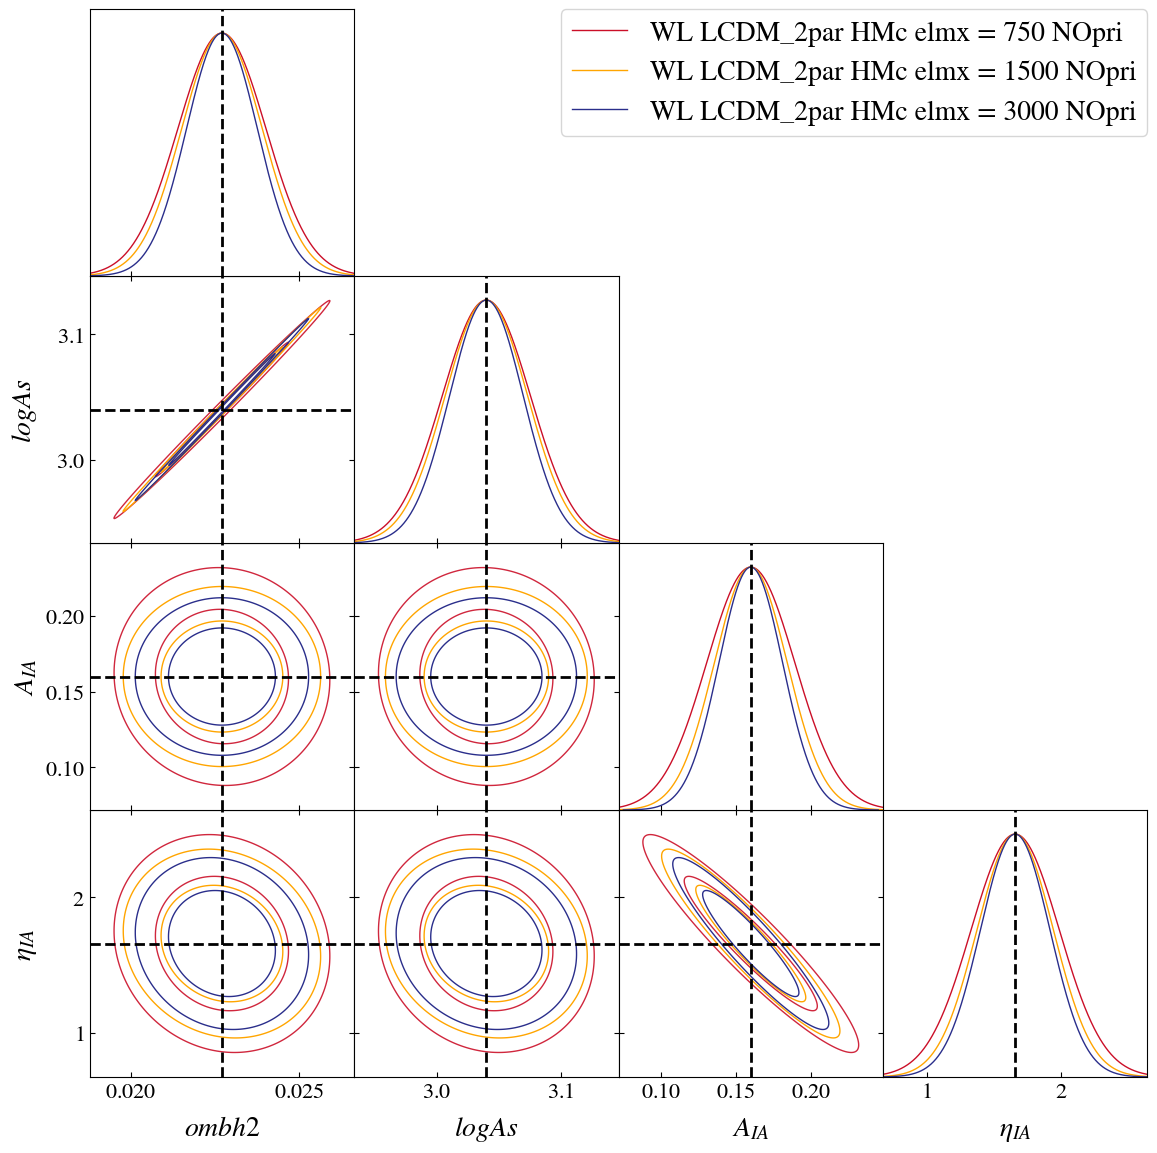

In [54]:
chooseind = [0,1,2]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': ['ombh2', 'logAs', 'AIA', 'etaIA'],
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM2p_WL-Nopri'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=[False, False, False, False])

./plots  exists already
Fisher matrix loaded, label name:  WL LCDM_2par HMc elmx = 750 BBNpri
Fisher matrix loaded, label name:  WL LCDM_2par HMc elmx = 1500 BBNpri
Fisher matrix loaded, label name:  WL LCDM_2par HMc elmx = 3000 BBNpri
Entering plotting routine
{'ombh2': [0.021605268213986, 0.023794731786014003], 'logAs': [3.0090795434521422, 3.070920456547858], 'AIA': [0.07176710611937077, 0.24823289388062925], 'etaIA': [0.6815103428669543, 2.6384896571330456]}


/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


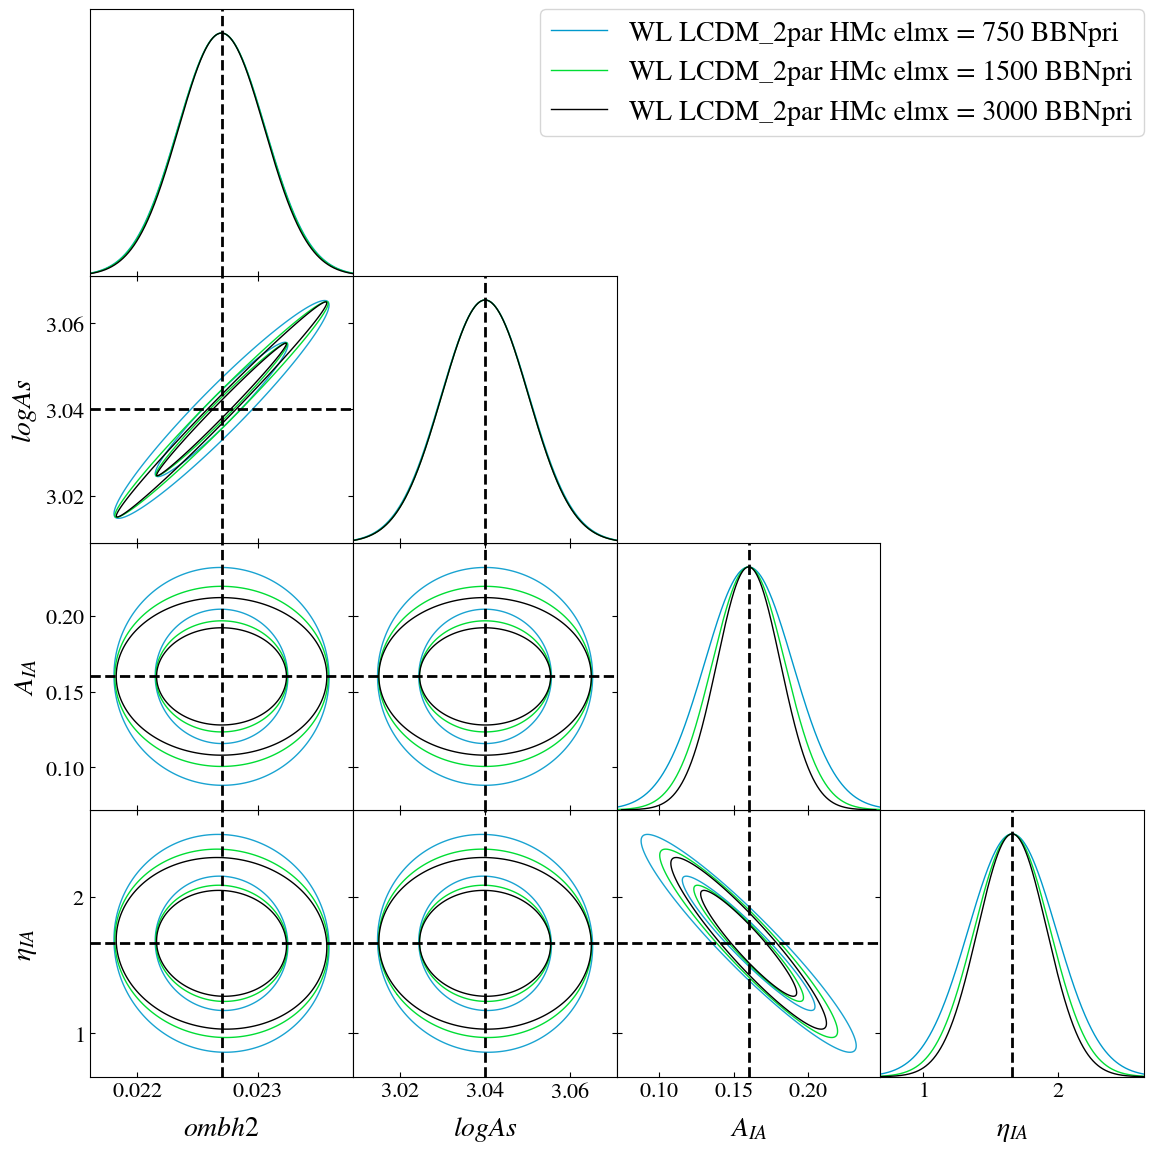

In [55]:
chooseind = [3,4,5]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': ['ombh2', 'logAs', 'AIA', 'etaIA'],
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM2p_WL-BBNpri'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=[False, False, False, False])

./plots  exists already
Fisher matrix loaded, label name:  WL LCDM_2par HMc elmx = 1500 NOpri
Fisher matrix loaded, label name:  WL LCDM_2par HMc elmx = 1500 BBNpri
Entering plotting routine
{'ombh2': [0.019111579448056873, 0.02628842055194313], 'logAs': [2.9403573400863188, 3.1396426599136813], 'AIA': [0.08704205267607641, 0.2329579473239236], 'etaIA': [0.8066882635502316, 2.513311736449768]}


/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


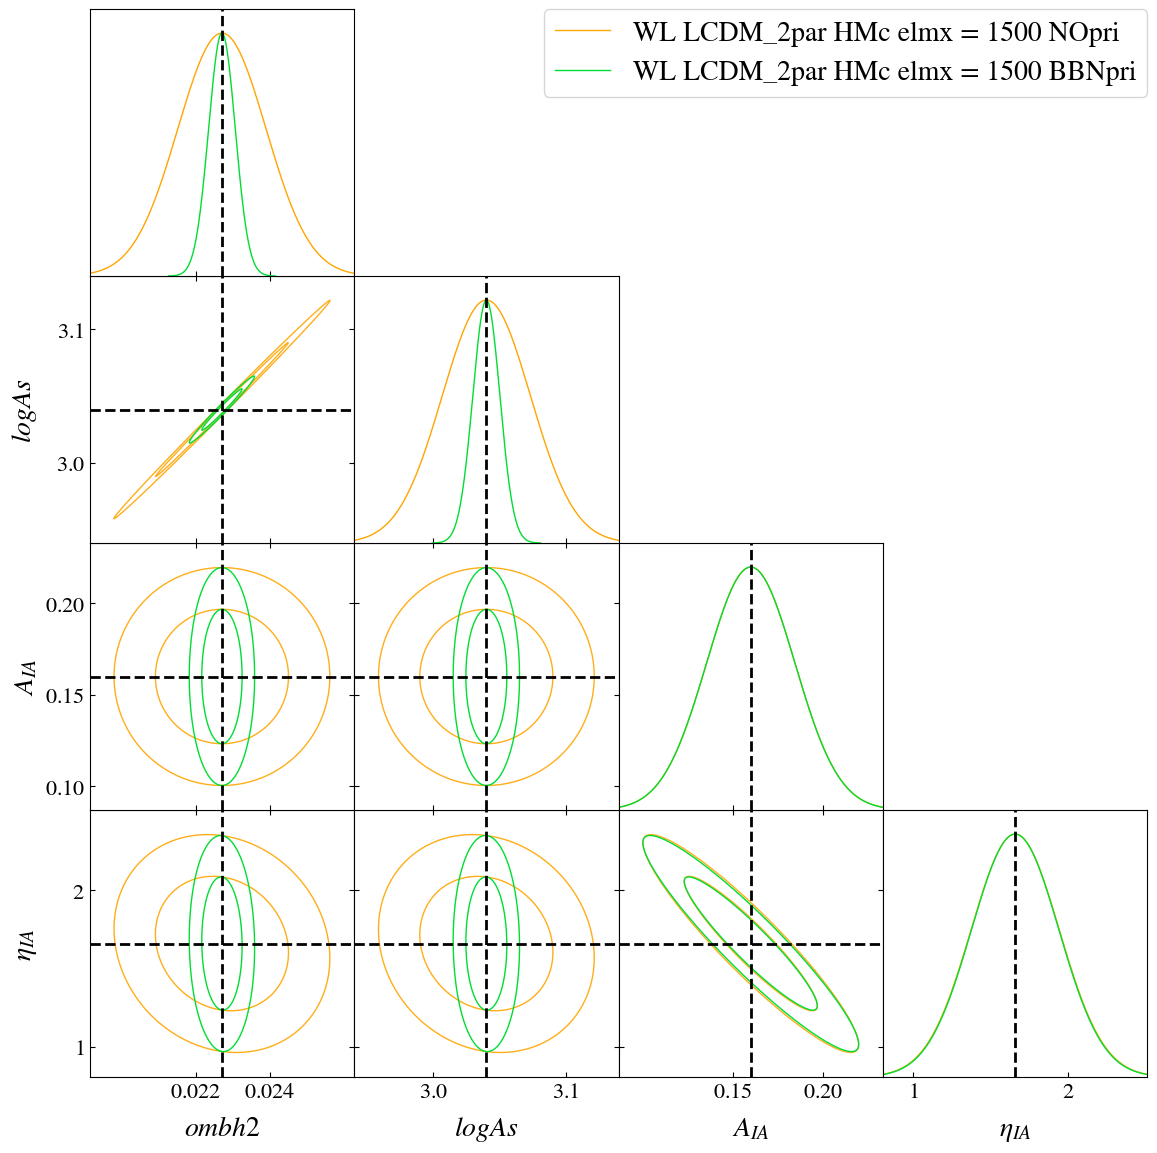

In [56]:
chooseind = [1,4]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': ['ombh2', 'logAs', 'AIA', 'etaIA'],
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM2p_WL-BBNpri'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=[False, False, False, False])

In [31]:
#fish_plotter.compare_errors({'colors': colorlist, 'ncol_legend':1, "y_lim":[-100,100]})